## MG-GY 8441: Data Engineering
### Lecture 1 

We want to get a better understanding of describing data. We will write code to generate

- Numerical Summaries 
 * mean, median, mode
 * percentile
- Visualization 
 * box-plot 
 * scatter-plot
 * histogram

We will study datasets about transportation. Below we work with tables containing 200,000 weekday Uber rides in the Manila, Philippines, and Boston, Massachusetts metropolitan areas from the [Uber Movement](https://movement.uber.com) project.

In [172]:
# importing some packages

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

# changing some settings

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8)

%matplotlib inline
plt.rcParams['figure.figsize'] = (9,7)

#### Loading the Data

We can load the data with the pandas package.

In [2]:
boston = pd.read_csv("boston.csv")
boston

,sourceid,dstid,hod,ride time
0,584,33,7,11.866000
1,1013,1116,13,17.799333
2,884,1190,22,19.348833
3,211,364,1,1.723500
4,218,1189,7,42.558833
...,...,...,...,...
199995,448,333,1,14.460833
199996,207,810,10,18.052333
199997,364,773,8,8.431333
199998,33,487,3,8.291667


In [3]:
manila = pd.read_csv("manila.csv")
manila

,sourceid,dstid,hod,ride time
0,544,5,22,22.811500
1,302,240,21,7.022667
2,278,99,16,21.643667
3,720,775,18,13.059667
4,599,125,9,49.685000
...,...,...,...,...
199995,836,817,16,14.471333
199996,567,246,17,54.929167
199997,398,409,18,57.592500
199998,544,380,8,65.472000


We have four columns corresponding to the four attributes of the data 

- The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. 
- The `hod` column contains codes corresponding to the hour of the day the ride took place. 
- The `ride time` table contains the length of the ride, in minutes.

We want to compare the trends in the ride time to inference differences between the two cities. We want to take advantage of both numerical summaries and visualizations. Let us start by studying the data about ride time in Boston

#### Summarizing the Data

We can generate a histogram of the ride times in Boston.

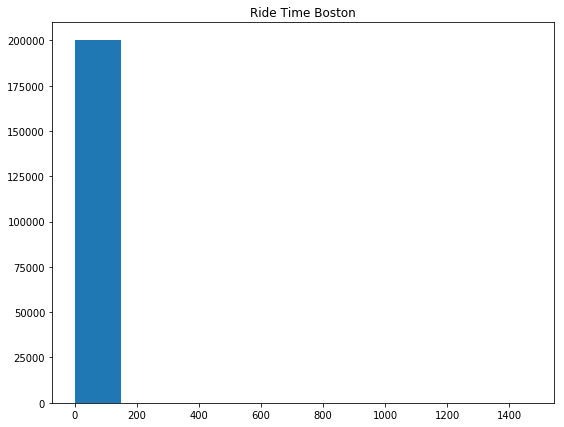

In [38]:
plt.hist(boston["ride time"])
plt.title("Ride Time Boston");

The histogram suggests that we have some outliers.

In [5]:
print("The maximum ride time is {}".format(boston["ride time"].max()))

The maximum ride time is 1471.9861666666666


Before we decide on an appropriate range of values for the histogram, we should exclude the outliers. We will use the conventions for a box-plot.

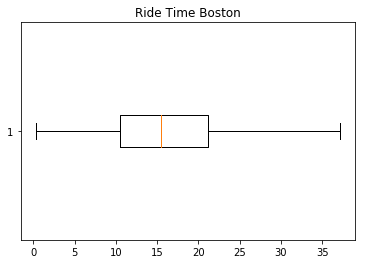

In [6]:
plt.boxplot(boston["ride time"], vert=False, showfliers=False)
plt.title("Ride Time Boston");

We can interpret the box-plot through a five number summary 

- minimum 
- first quartile 
- median (second quartile)
- thrid quartile
- maximum

We will use the `quantile` method to compute the numbers

In [7]:
minimum = boston["ride time"].min() 
first_quartile =  boston["ride time"].quantile(0.25)
median = boston["ride time"].quantile(0.5)
third_quartile = boston["ride time"].quantile(0.75)
maximum = boston["ride time"].max()

Now we can compute the inter-quartile range.

In [8]:
iqr = third_quartile - first_quartile

Remember the rule for computing the outliers in a boxplot. Any number 

- greater than $\text{third quartile} + 1.5 * \text{inter-quartile range}$
- less than $\text{first quartile} - 1.5 * \text{inter-quartile range}$

Is an outlier.

In [9]:
upper_bound = third_quartile + 1.5 * iqr
lower_bound = first_quartile - 1.5 * iqr

mask = (boston["ride time"] >= upper_bound) | (boston["ride time"] <= lower_bound)
outliers = boston["ride time"][mask]
outliers

4         42.558833
12        38.004667
99        40.000000
122       50.252833
330       43.761167
            ...    
199820    37.462667
199822    40.306667
199829    43.164667
199851    38.513500
199882    47.572167
Name: ride time, Length: 4248, dtype: float64

We can drop these entries from the table.

In [10]:
boston_without_outliers = boston.drop(index=outliers.index)

Before we can label the box-plot, we should compute the location of the whiskers.

In [11]:
minimum_without_outliers = boston_without_outliers["ride time"].min() 
maximum_without_outliers = boston_without_outliers["ride time"].max() 

Now we have all of the information we need to add the numerical summaries to the visualization.

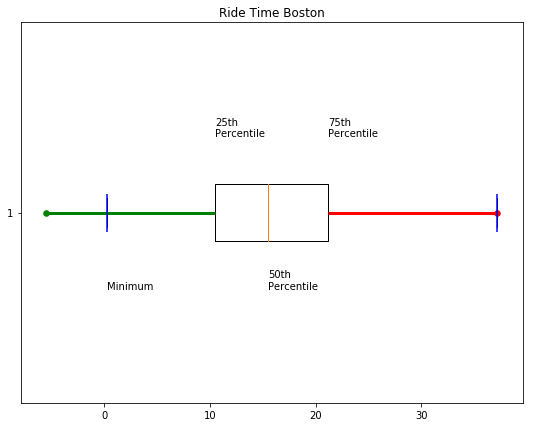

In [14]:
# generate box-plot of boston table
plt.boxplot(boston["ride time"], vert = False, showfliers=False)
plt.title("Ride Time Boston");

# indicate upper bound and lower bound
plt.scatter(lower_bound, 1, s = 30, c = "g")
plt.scatter(upper_bound, 1, s = 30, c = "r")

plt.hlines(y = 1, xmin = lower_bound, xmax=first_quartile, color="green", lw = 3, zorder=10)
plt.hlines(y = 1, xmin = third_quartile, xmax=upper_bound, color="red", lw = 3, zorder=10)

# indicate the whiskers
plt.vlines(x = minimum_without_outliers, ymin = 0.95, ymax = 1.05, colors='b', zorder = 10)
plt.vlines(x = maximum_without_outliers, ymin = 0.95, ymax = 1.05, colors='b', zorder = 10)

# label the five number summary
plt.annotate("75th\nPercentile",(third_quartile, 1.2))
plt.annotate("25th\nPercentile",(first_quartile, 1.2))
plt.annotate("Minimum",(minimum, 0.8))
# plt.annotate("Maximum",(maximum, 0.8))
plt.annotate("50th\nPercentile",(median, 0.8));

We learn from the box-plot that the range 0 to 40 would be appropriate for the histogram.

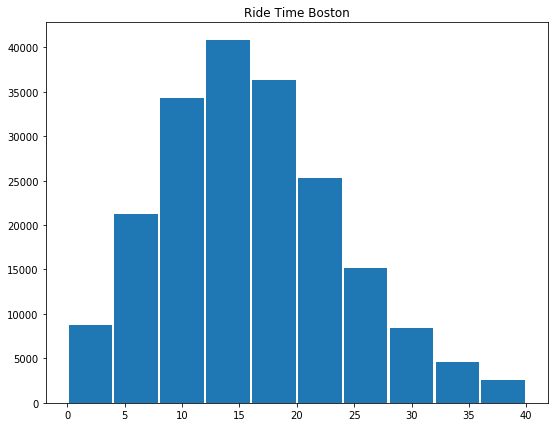

In [16]:
plt.hist(boston["ride time"], rwidth=0.95, range = [0,40])
plt.title("Ride Time Boston");

#### Comparing Numerical Summaries

Note that the data displays a positive skew. We can compare 

- median 
- mean 
- mode 

We can compute these quantities on the table without outliers. 

In [30]:
median = boston_without_outliers["ride time"].quantile(0.5)
mean = boston_without_outliers["ride time"].mean()
mode = boston_without_outliers["ride time"].mode()[0]

We can confirm that positive skew by adding the mean and median to the histogram.

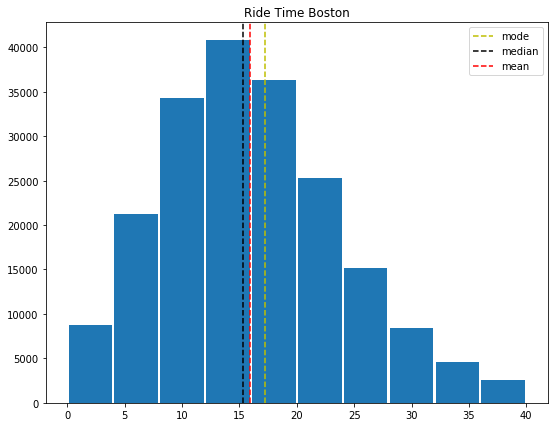

In [37]:
plt.hist(boston["ride time"], rwidth=0.95, range = [0,40])
plt.title("Ride Time Boston")
plt.axvline(x = mode, color = "y", linestyle = "dashed", label = "mode")
plt.axvline(x = median, color = "k", linestyle = "dashed", label = "median")
plt.axvline(x = mean, color = "r", linestyle = "dashed", label = "mean")
plt.legend();

We find that the mean lies to the right of the median. So we have outliers to the right. 

Note that the mode lies to the right of the most frequent values. We have to remember that the ride time is a continuous variable. We can get a better understanding of the frequent values by rounding the numbers down. After we round the numbers we have a discrete variable allowing us to count frequencies

In [46]:
mode = boston_without_outliers["ride time"].astype(int).mode()[0]

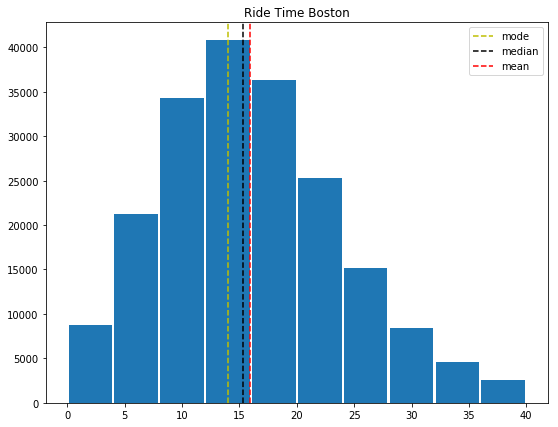

In [47]:
plt.hist(boston["ride time"], rwidth=0.95, range = [0,40])
plt.title("Ride Time Boston")
plt.axvline(x = mode, color = "y", linestyle = "dashed", label = "mode")
plt.axvline(x = median, color = "k", linestyle = "dashed", label = "median")
plt.axvline(x = mean, color = "r", linestyle = "dashed", label = "mean")
plt.legend();

If we have skewed data, then we can try to guess the median from the mean and mode. The formula is 

$$\text{median} \approx  (2 * \text{mean} + \text{mode}) \; / \; 3 $$

We can compare the numbers.

In [51]:
estimate_median = ( 2 * mean  + mode) / 3

print("The median is {}".format(median))
print("The estimated median is {}".format(estimate_median))

The median is 15.298333333333334
The estimated median is 15.252628205870495


We have a close agreement between the numbers.

#### Grouping the Data 

Remember that granularity refers to the level of detail in the data. We can get a better understanding of patterns in the data by reducing the granularity through grouping related records. We want to group into duration of ride time

1: 0-20   minutes  
2: 20-40 minutes  
3: 40-60 minutes  
4: 60-80 minutes  

We will use the pandas function `cut` to break into groups.

In [82]:
ride_shorter_than_80_minutes = boston[boston["ride time"] <= 80].copy()
ride_shorter_than_80_minutes["bucket"] = pd.cut(ride_shorter_than_80_minutes["ride time"], bins = range(0,100,20))
ride_shorter_than_80_minutes

,sourceid,dstid,hod,ride time,bucket
0,584,33,7,11.866000,"(0, 20]"
1,1013,1116,13,17.799333,"(0, 20]"
2,884,1190,22,19.348833,"(0, 20]"
3,211,364,1,1.723500,"(0, 20]"
4,218,1189,7,42.558833,"(40, 60]"
...,...,...,...,...,...
199995,448,333,1,14.460833,"(0, 20]"
199996,207,810,10,18.052333,"(0, 20]"
199997,364,773,8,8.431333,"(0, 20]"
199998,33,487,3,8.291667,"(0, 20]"


We have added another column to the table consisting of rides less than 80 minutes. The column contains the range corresponding to the ride time. 

In [83]:
groups = ride_shorter_than_80_minutes.groupby("bucket").agg({"ride time": len})
groups

,ride time
bucket,
"(0, 20]",141357.0
"(20, 40]",56043.0
"(40, 60]",2467.0
"(60, 80]",92.0


We can group the records by the ranges in the `buckets` column. We can count the number of records in each group. 

In [84]:
groups.index.name = "Minutes"
groups.columns = ["Frequency"]
groups

,Frequency
Minutes,
"(0, 20]",141357.0
"(20, 40]",56043.0
"(40, 60]",2467.0
"(60, 80]",92.0


We rename the entries to remind ourselves that we have a range of ride time in minutes and the corresponding frequency. 

If we just had the table `groups`, then could we compute 

- mean 
- median 
- mode 

that approximate the mean, median and mode in `ride_shorter_than_80_minutes`? 

In [92]:
groups["Middle Value"] = [10,30,50,70]
groups

,Frequency,Middle Value
Minutes,,
"(0, 20]",141357.0,10
"(20, 40]",56043.0,30
"(40, 60]",2467.0,50
"(60, 80]",92.0,70


We can use the middle value in each range to summarize the ride times.

$$\displaystyle \frac{141357 * 10 + 56043 * 30 + 2467 * 50 + 92 * 70}{141357 + 56043 + 2467 + 92}$$

If we pretend that the frequency indicate the number of times the middle value occurs in the dataset, then we can generate something like a mean.

In [96]:
grouped_mean = np.sum(groups["Middle Value"] * groups["Frequency"]) / groups["Frequency"].sum()
grouped_mean

16.126555943968512

Note the close agreement between this number and the mean of the ride times in `ride_shorter_than_80_minutes`.

In [208]:
ride_shorter_than_80_minutes["ride time"].mean()

16.44959508949343

We have about 200000 records in the dataset. So if we sorted the ride times from shortest to longest, then the median would be value of the 100000th records. 

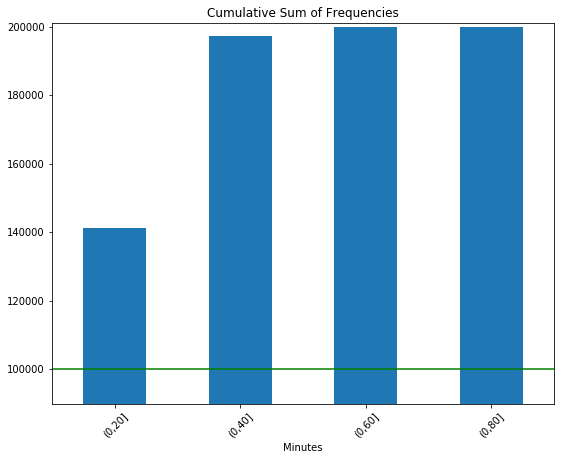

In [204]:
groups["Frequency"].cumsum().plot(kind="bar", rot = 45)
plt.ylim([90000, 201000])
plt.axhline(groups["Frequency"].sum() / 2, color = "g")
plt.title("Cumulative Sum of Frequencies")
plt.xticks([0,1,2,3], labels = ["(0,20]","(0,40]","(0,60]","(0,80]"]);

By plotting a cumulative sum of the frequencies in `groups` table, we find that the 100000th record occurs in the range `(0,20]`. So we should choose the grouped mean to lie somewhere between 0 and 20.  

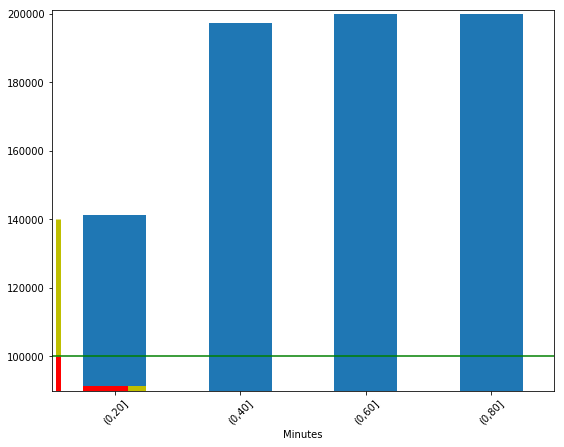

In [206]:
groups["Frequency"].cumsum().plot(kind="bar", rot = 45)
plt.ylim([90000, 201000])
plt.axhline(groups["Frequency"].sum() / 2, color = "g")
plt.vlines(x= -0.45, ymin = 90000, ymax = 100000, colors = "r", lw = 5  )
plt.vlines(x= -0.45, ymin = 100000, ymax = 140000 , colors = "y", lw = 5  )
plt.hlines(y= 90000, xmin = -0.25, xmax = -0.25 + 0.5 * fraction_of_range, colors = "r", lw = 10 )
plt.hlines(y= 90000, xmin = -0.25 + 0.5 * fraction_of_range, xmax = -0.25 + 0.5, colors = "y", lw = 10 )
plt.xticks([0,1,2,3], labels = ["(0,20]","(0,40]","(0,60]","(0,80]"]);

Note that we have about 140000 records in the range `(0,20]`. We can use the ratio

$$\displaystyle \frac{100000}{140000}$$

to determine a value for the median between 0 and 20. We choose 

$$\displaystyle \frac{100000}{140000} \left(20 - 0\right)$$

So the grouped mean is about 14.2

In [207]:
grouped_median = (100000 / 140000) * 20
grouped_median

14.285714285714286

Note the close agreement with the median from `ride_shorter_than_80_minutes`

In [211]:
ride_shorter_than_80_minutes["ride time"].median()

15.5

#### Comparing the Data

Having studied the data about Boston, we want to compare to the data about Manila. 

In [212]:
ride_shorter_than_80_minutes_manila = manila[manila["ride time"] <= 80].copy()

Having determined the ride in Manila less than 80 minutes, we can compare the two cities with histograms.

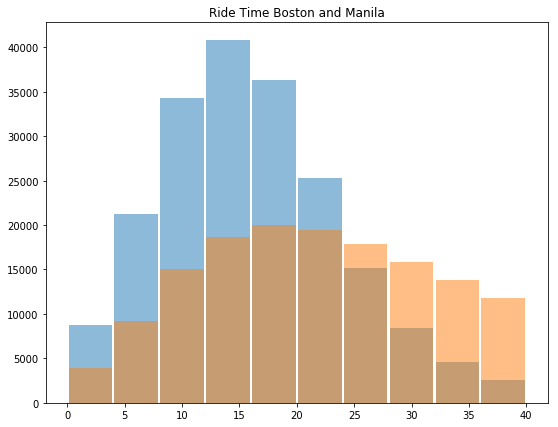

In [184]:
plt.hist(ride_shorter_than_80_minutes["ride time"], rwidth=0.95, range = [0,40], alpha = 0.5)
plt.hist(ride_shorter_than_80_minutes_manila["ride time"], rwidth=0.95, range = [0,40], alpha = 0.5)
plt.title("Ride Time Boston and Manila");

It appears that rides in Manila are longer than rides in Boston. We can compare with a quantile-quantile plot.

In [213]:
manila_quantiles = [ride_shorter_than_80_minutes_manila["ride time"].quantile(p) for p in np.arange(0.0,1,0.05)]
boston_quantiles = [ride_shorter_than_80_minutes["ride time"].quantile(p) for p in np.arange(0.0,1,0.05)]

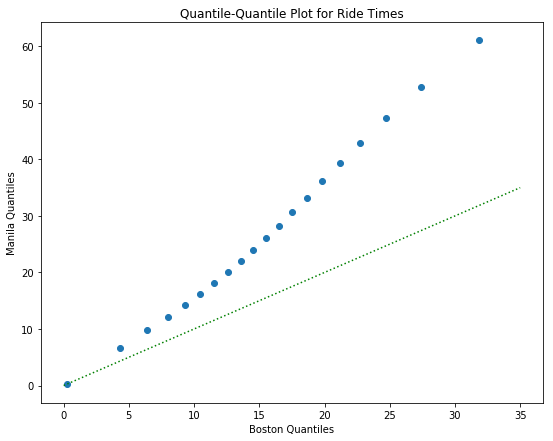

In [214]:
plt.scatter(boston_quantiles, manila_quantiles)
plt.plot(np.linspace(0,35,100), np.linspace(0,35,100), "g:")
plt.ylabel("Manila Quantiles")
plt.xlabel("Boston Quantiles")
plt.title("Quantile-Quantile Plot for Ride Times");